In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.stats as st
from statsmodels.formula.api import ols 
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)
import statsmodels.api as sm 

read the data set

In [67]:
students = pd.read_csv("data/StudentsPerformance.csv")

because there is spaces in column's name we are going to replace it with "_"

In [68]:
students.columns = students.columns.str.replace(' ', '_')

explore the data set

In [29]:
students.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


show column's name 

In [30]:
students.columns

Index(['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

EDA

show the relashionship between all Continuous features

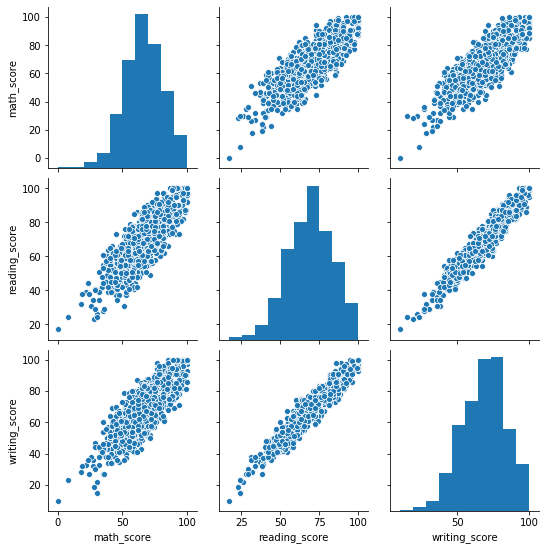

In [31]:
sns.pairplot(students, vars = ["math_score", "reading_score", "writing_score"])

These plots show us that there is a relation between all the subjects. In addition, all of them are distributed normally

correlations between the continouse features 

In [32]:
students[["math_score", "reading_score", "writing_score"]].corr()

,math_score,reading_score,writing_score
math_score,1.000000,0.817580,0.802642
reading_score,0.817580,1.000000,0.954598
writing_score,0.802642,0.954598,1.000000


show correlations between the continouse features 
THe reading score and the writing score are highly correlated

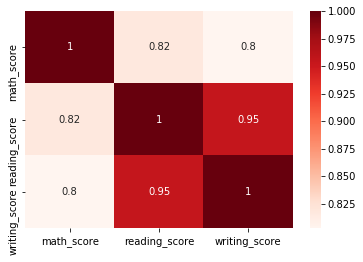

In [33]:
sns.heatmap(students[["math_score", "reading_score", "writing_score"]].corr(), annot=True, cmap = 'Reds')

adding index column to the data set 
in order to melt using this identifier for each row 

In [69]:
students = students.reset_index() 


rename index column

In [70]:
students =  students.rename(columns = {"index": "ID"})
students

,ID,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,0,female,group B,bachelor's degree,standard,none,72,72,74
1,1,female,group C,some college,standard,completed,69,90,88
2,2,female,group B,master's degree,standard,none,90,95,93
3,3,male,group A,associate's degree,free/reduced,none,47,57,44
4,4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...,...
995,995,female,group E,master's degree,standard,completed,88,99,95
996,996,male,group C,high school,free/reduced,none,62,55,55
997,997,female,group C,high school,free/reduced,completed,59,71,65
998,998,female,group D,some college,standard,completed,68,78,77


create tidy data set and create one column for subjects' name and one for its scores

In [71]:
students_t = students.melt(id_vars= ['ID', 
                                        'gender', 
                                        'race/ethnicity',
                                        'parental_level_of_education',
                                        'lunch', 
                                        'test_preparation_course'], 
                                value_vars=['math_score', 
                                            'reading_score', 
                                            'writing_score'],
                                var_name='sbj_name',
                                value_name='scores')


compare the scores for each subject based in the gender


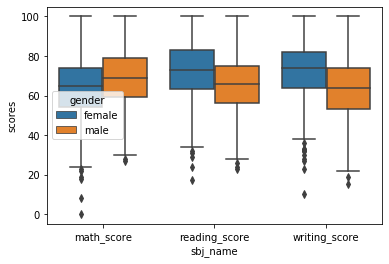

In [37]:
sns.boxplot(students_t.sbj_name, students_t.scores, hue = students_t.gender)

test if the melting worked well

In [38]:
students_t.loc[students_t['ID'] == 3]


,ID,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,sbj_name,scores
3,3,male,group A,associate's degree,free/reduced,none,math_score,47
1003,3,male,group A,associate's degree,free/reduced,none,reading_score,57
2003,3,male,group A,associate's degree,free/reduced,none,writing_score,44


Descriptive statistics 

In [39]:
students_t.groupby(['gender','sbj_name'])['scores'].describe()


count       mean        std   min    25%   50%    75%  \
gender sbj_name                                                               
female math_score     518.0  63.633205  15.491453   0.0  54.00  65.0  74.00   
       reading_score  518.0  72.608108  14.378245  17.0  63.25  73.0  83.00   
       writing_score  518.0  72.467181  14.844842  10.0  64.00  74.0  82.00   
male   math_score     482.0  68.728216  14.356277  27.0  59.00  69.0  79.00   
       reading_score  482.0  65.473029  13.931832  23.0  56.00  66.0  75.00   
       writing_score  482.0  63.311203  14.113832  15.0  53.00  64.0  73.75   

                        max  
gender sbj_name              
female math_score     100.0  
       reading_score  100.0  
       writing_score  100.0  
male   math_score     100.0  
       reading_score  100.0  
       writing_score  100.0

Infrential statistics 

Normal distribution for the three subjects
it is clear that all the subjects' score are normally distributed

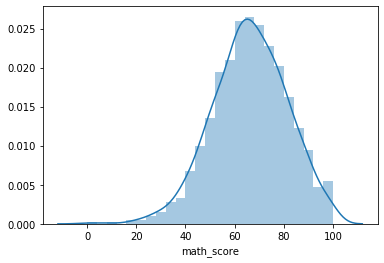

In [121]:
sns.distplot(students["math_score"])

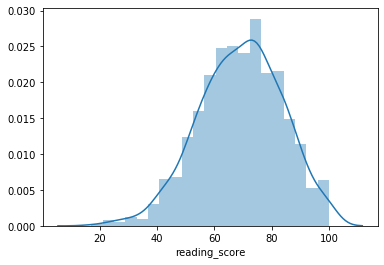

In [122]:
sns.distplot(students["reading_score"])

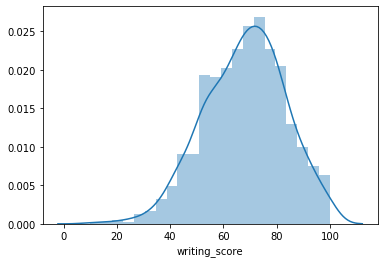

In [123]:
sns.distplot(students["writing_score"])

central limit theorem 


In [50]:
# Create a list
sampled_means = []
#create a list contain subject's name
subjects = ["math_score", "reading_score", "writing_score"]


iterate this for loop for each subject and print the central limit theorem

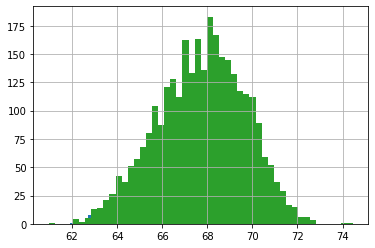

In [49]:
# For 1000  times
for i in subjects:
    for ii in range(0,1000):
        sampled_means.append(students[i].sample(n=100).mean())
    pd.Series(sampled_means).hist(bins=50)


The data is normally distributed in math, reading, and writing score in both population 
and sample means the sample mean x¯ is an unbiased estimator for the underlying population mean μ the sample means x¯ are centered on the population mean μ

95% CI for each subject 

In [51]:
#creat a list 
CI = []
for i in subjects:
    CI.append(st.t.interval(alpha=0.95, df=len(students[i])-1, loc=np.mean(students[i]), scale=st.sem(students[i])))

print 95% for math

In [52]:
math_CI = CI[0]
math_CI

(65.14805983128305, 67.02994016871695)

There is a 95% chance that interval [65.14806, 67.02994] covers the true population parameter μ (66.089)

print the CI for reading

In [53]:
reading_CI = CI[1]
reading_CI

(68.26298967902613, 70.07501032097386)

There is a 95% chance that interval [68.26299, 70.07501] covers the true population parameter μ (69.169)

print the CI for writing

In [54]:
writing_CI = CI[2]
writing_CI

(67.11103828107223, 68.99696171892778)

There is a 95% chance that interval [67.11104, 68.99696] covers the true population parameter μ (68.054)

Linear regression between math score and reading score

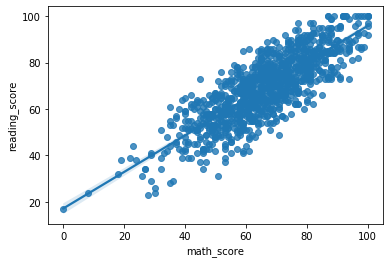

In [55]:
sns.regplot(x="math_score", y="reading_score", data = students)

t-test

In [56]:
st.ttest_ind(students['math_score'],
                students['reading_score'])

Ttest_indResult(statistic=-4.627084038100885, pvalue=3.946445546435526e-06)

Reject the null hypothesis There is a relashion between math score and reading score



Linear regression between math score and writing score

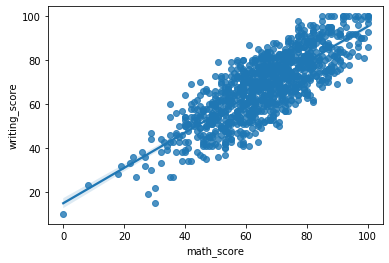

In [57]:
sns.regplot(x="math_score", y="writing_score", data = students)

Reject the null hypothesis

t-test

In [58]:
st.ttest_ind(students['math_score'],
                students['writing_score'])

Ttest_indResult(statistic=-2.8946336144447704, pvalue=0.00383720001523225)

1-way ANOVA

In [87]:
model = ols("math_score ~ parental_level_of_education", students)
results = model.fit()
aov_table = sm.stats.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
parental_level_of_education,7295.561831,5.0,6.521583,0.000006
Residual,222393.517169,994.0,NaN,NaN


The lowest scores illustrates that the students whose parent have high school education

tucky test 

In [90]:
tuky_students = pairwise_tukeyhsd(students['math_score'], students['parental_level_of_education'])
print("full tukey")
print(tuky_students)

full tukey
            Multiple Comparison of Means - Tukey HSD, FWER=0.05             
      group1             group2      meandiff p-adj   lower    upper  reject
----------------------------------------------------------------------------
associate's degree bachelor's degree   1.5069    0.9  -3.3586  6.3725  False
associate's degree       high school  -5.7451 0.0013  -9.9311 -1.5592   True
associate's degree   master's degree   1.8629    0.9  -4.3926  8.1184  False
associate's degree      some college  -0.7546    0.9  -4.7903  3.2812  False
associate's degree  some high school  -4.3857 0.0418  -8.6759 -0.0954   True
 bachelor's degree       high school  -7.2521  0.001 -12.2284 -2.2758   True
 bachelor's degree   master's degree   0.3559    0.9  -6.4538  7.1657  False
 bachelor's degree      some college  -2.2615 0.7401  -7.1121  2.5891  False
 bachelor's degree  some high school  -5.8926 0.0119  -10.957 -0.8283   True
       high school   master's degree    7.608 0.0084    1.266   1